In [1]:
from models.ffnn import BrainFFNN
from models.vgg import BrainVGG

In [2]:
ffnn = BrainFFNN()

c:\Users\matty\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [3]:
ffnn.train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [4]:
hist = ffnn.train(epochs=12)

Epoch 1/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 146ms/step - accuracy: 0.4585 - loss: 1077.4899 - val_accuracy: 0.5814 - val_loss: 111.6384
Epoch 2/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.6339 - loss: 121.8667 - val_accuracy: 0.6751 - val_loss: 68.8964
Epoch 3/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 138ms/step - accuracy: 0.7241 - loss: 54.6459 - val_accuracy: 0.6970 - val_loss: 36.6496
Epoch 4/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.7543 - loss: 33.2190 - val_accuracy: 0.7329 - val_loss: 25.9424
Epoch 5/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.7983 - loss: 17.6967 - val_accuracy: 0.6883 - val_loss: 29.7234
Epoch 6/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.8131 - loss: 13.3138 - val_accuracy: 0.7671 - val_loss: 20.6741
Epoch 7/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.8341 - loss: 9.5350 - val_accuracy: 0.7399 - val_loss: 27.9076
Epoch 8/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy:

In [5]:
ffnn.eval()

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7891 - loss: 13.7989


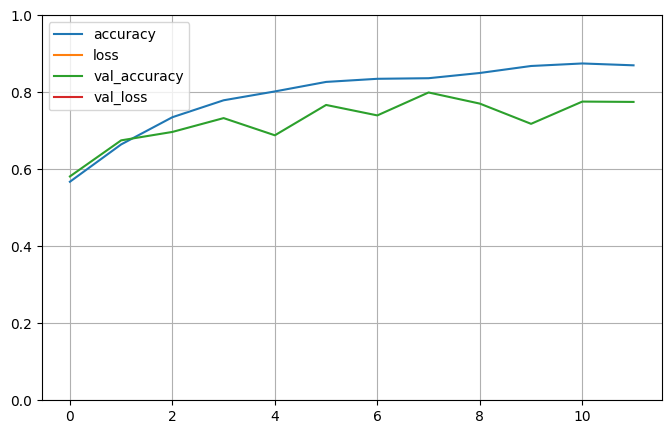

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [8]:
ffnn.model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,432,654 (192.39 MB)

 Trainable params: 16,810,884 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,621,770 (128.26 MB)

In [9]:
ffnn.save()

In [10]:
vgg = BrainVGG()

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [11]:
hist = vgg.train(epochs=10)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1634s 11s/step - accuracy: 0.2699 - loss: 363.2843 - val_accuracy: 0.3687 - val_loss: 1.1637
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1592s 11s/step - accuracy: 0.4446 - loss: 1.1083 - val_accuracy: 0.6375 - val_loss: 0.7917
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1550s 11s/step - accuracy: 0.7127 - loss: 0.6673 - val_accuracy: 0.7890 - val_loss: 0.5412
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1547s 11s/step - accuracy: 0.7745 - loss: 0.5828 - val_accuracy: 0.8205 - val_loss: 0.4675
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1541s 11s/step - accuracy: 0.8142 - loss: 0.4938 - val_accuracy: 0.8336 - val_loss: 0.4670
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1547s 11s/step - accuracy: 0.8448 - loss: 0.4287 - val_accuracy: 0.8494 - val_loss: 0.3998
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1609s 11s/step - accuracy: 0.8713 - loss: 0.3516 - val_accuracy: 0.8853 - val_loss: 0.3208
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1632s 11s/step - accuracy: 0.8916 - loss:

In [13]:
vgg.eval()

41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.8554 - loss: 0.3518


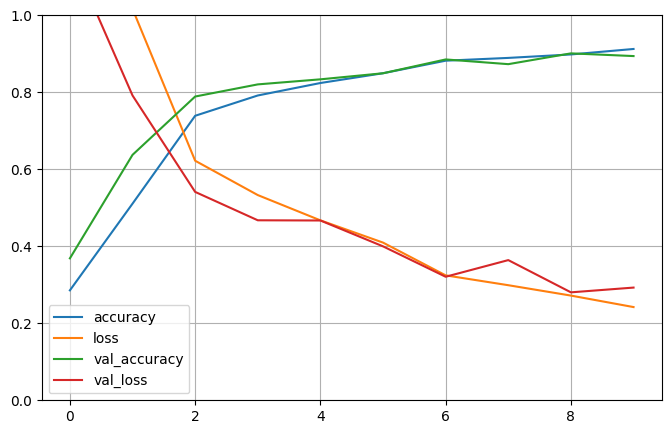

In [14]:
import pandas as pd

pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
vgg.model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   134,221,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 513,128,270 (1.91 GB)

 Trainable params: 171,042,756 (652.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 342,085,514 (1.27 GB)

In [12]:
vgg.save()